### 7130ICT Data Analytics
### Trimester 1 - 2023, Assignment
### Student Name(sNumber): Billy Wing Hoi Ho(s5291906), Kin Wing Chung(s5274387)
### Student email: billywinghoi.ho@griffithuni.edu.au , s5274387@griffithuni.edu.au

### Part 1 – Data Preparation and Preprocessing. [15 points]
### 1. Describe the dataset. (8 points)

In [1]:
import pandas as pd
df = pd.read_csv('data.csv')

df.head()

C:\Users\Billy\AppData\Local\Temp\ipykernel_3300\2920980107.py:2: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


#### Describe the dataset (e.g.: type of column, value range). (1 point)

#### type of column

In [2]:
column_types = df.dtypes

# Print the result
print("The type of column:")
print(column_types)

The type of column:
Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object


#### value range

In [3]:
# Find the minimum and maximum values for LowestSalary and HighestSalary columns
lowest_salary_min = df['LowestSalary'].min()
lowest_salary_max = df['LowestSalary'].max()
highest_salary_min = df['HighestSalary'].min()
highest_salary_max = df['HighestSalary'].max()

# Print the results
print("LowestSalary value range: {} - {}".format(lowest_salary_min, lowest_salary_max))
print("HighestSalary value range: {} - {}".format(highest_salary_min, highest_salary_max))

LowestSalary value range: 0 - 200
HighestSalary value range: 30 - 999


#### How many records are there in the dataset? (1 point)


In [4]:
num_records = df.shape[0]

# Print the result
print("There are {} records in the dataset.".format(num_records))

There are 318477 records in the dataset.


##### Which period does it cover? How many different dates have job postings? (1 point)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

# Find the minimum and maximum dates
min_date = df['Date'].min()
max_date = df['Date'].max()

# Calculate the number of unique dates
num_unique_dates = df['Date'].nunique()

# Print the results
print("It covers the period from", min_date.strftime('%Y-%m-%d'), "to", max_date.strftime('%Y-%m-%d'))
print("There are", num_unique_dates, "different dates with job postings.")

It covers the period from 2018-10-01 to 2019-03-13
There are 163 different dates with job postings.


#### How many locations does the dataset have? Which location has the most job postings? (1 point)

In [6]:
# Get the count of unique locations
num_locations = df['Location'].nunique()

# Get the location with the most job postings
most_job_postings_location = df['Location'].value_counts().idxmax()

# Print the results
print("The dataset has {} unique locations.".format(num_locations))
print("The location with the most job postings is {}.".format(most_job_postings_location))

The dataset has 65 unique locations.
The location with the most job postings is Sydney.


#### How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings. (1 point)

In [7]:
job_sector_counts = df['Classification'].value_counts()

# Print the results
print("There are {} job sectors in the dataset:".format(len(job_sector_counts)))
for sector, count in job_sector_counts.items():
    print("- {} : {}".format(sector, count))

There are 30 job sectors in the dataset:
- Information & Communication Technology : 22796
- Trades & Services : 17976
- Healthcare & Medical : 17085
- Hospitality & Tourism : 15523
- Manufacturing, Transport & Logistics : 12376
- Administration & Office Support : 10020
- Accounting : 9368
- Education & Training : 9280
- Construction : 8372
- Sales : 8119
- Retail & Consumer Products : 8041
- Government & Defence : 7443
- Engineering : 6458
- Mining, Resources & Energy : 6288
- Banking & Financial Services : 4633
- Community Services & Development : 4485
- Legal : 4237
- Human Resources & Recruitment : 4144
- Call Centre & Customer Service : 3971
- Marketing & Communications : 3968
- Real Estate & Property : 3614
- Design & Architecture : 1811
- Insurance & Superannuation : 1474
- Consulting & Strategy : 1206
- Sport & Recreation : 984
- Science & Technology : 905
- Farming, Animals & Conservation : 882
- CEO & General Management : 844
- Advertising, Arts & Media : 833
- Self Employment

#### Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number. (1 point)

In [8]:
# Filter for the "Manufacturing, Transport & Logistics" job sector and get the count of sub-sectors
mtl_df = df[df['Classification'] == 'Manufacturing, Transport & Logistics']
num_subsectors = mtl_df['SubClassification'].nunique()

# Get the count of job postings for each sub-sector
subsector_counts = mtl_df['SubClassification'].value_counts()

# Print the results
print("'Manufacturing, Transport & Logistics' sector is chosen. There are {} sub-sectors in the 'Manufacturing, Transport & Logistics' sector:".format(num_subsectors))
for subsector, count in subsector_counts.items():
    print("- {} : {}".format(subsector, count))

'Manufacturing, Transport & Logistics' sector is chosen. There are 20 sub-sectors in the 'Manufacturing, Transport & Logistics' sector:
- Warehousing, Storage & Distribution : 3636
- Road Transport : 1762
- Assembly & Process Work : 956
- Machine Operators : 873
- Purchasing, Procurement & Inventory : 745
- Couriers, Drivers & Postal Services : 722
- Management : 511
- Pickers & Packers : 508
- Production, Planning & Scheduling : 504
- Other : 473
- Team Leaders/Supervisors : 345
- Freight/Cargo Forwarding : 292
- Quality Assurance & Control : 231
- Rail & Maritime Transport : 222
- Import/Export & Customs : 160
- Aviation Services : 158
- Fleet Management : 103
- Analysis & Reporting : 95
- Public Transport & Taxi Services : 59
- Pattern Makers & Garment Technicians : 21


#### List the salary ranges and their total of job postings. (1 point)

In [9]:
# Create a new column for salary ranges
df['SalaryRange'] = df['LowestSalary'].astype(str) + '-' + df['HighestSalary'].astype(str)

# Group by salary ranges and calculate total job postings
salary_counts = df['SalaryRange'].value_counts()

# Display the salary ranges and total job postings
print(salary_counts)

SalaryRange
0-30       62639
40-50      34436
70-80      28712
60-70      28499
100-120    27673
50-60      27027
150-200    25841
120-150    24514
80-100     24249
30-40      23476
200-999    11411
Name: count, dtype: int64


#### List the job types. In each job type, what are the lowest salary and highest salary? (1 point)

In [10]:
# Group by JobType and get the minimum and maximum salary values
job_type_salaries = df.groupby('JobType').agg({'LowestSalary': 'min', 'HighestSalary': 'max'})

# Print the results
print("Job types and their corresponding lowest and highest salaries:")
for job_type, row in job_type_salaries.iterrows():
    print("- {}: ${} - ${}".format(job_type, row['LowestSalary'], row['HighestSalary']))

Job types and their corresponding lowest and highest salaries:
- Casual/Vacation: $0 - $999
- Contract/Temp: $0 - $999
- Full Time: $0 - $999
- Part Time: $0 - $999


### 2. Normalize and clean data. (7 points)
#### The salaries are kept in the dataset as “HighestSalary” and “LowestSalary”. You should calculate the “AverageSalary” for each job. (1 point)

In [11]:
# Add a new column for the average salary
df['AverageSalary'] = (df['LowestSalary'] + df['HighestSalary']) / 2

# Group the data by job title and calculate the average salary for each job
job_avg_salary = df.groupby('Title')['AverageSalary'].mean()

# Print the results
print("Average salary for each job:")
print(job_avg_salary)

Average salary for each job:
Title
                                          Laboratory Sales Specialist            135.0
    General Entry Meat Process Worker - Hemmant                                   35.0
  Data Integration Consultants - Dell Boomi Experts                              110.0
  SAP Administrator                                                               55.0
 .Net/ Umbraco Developer                                                          65.0
                                                                                 ...  
💥👗UNISEX APPAREL💥👕 OUTLET AND FLAGSHIP MANAGERS 💥 - MELB CBD AND SURROUNDS        55.0
📣 Calling Melbourne Managers with Energy PLUS! 💥 Kids & Teens Fashion 👗👕🛍         45.0
📣 Calling Sydney Store Managers with Energy PLUS! 💥 Kids & Teens Fashion 🛍        45.0
📣 Retail Managers 📣 Do you thrive in a fast paced high volume environment!? 🛍     45.0
🛍MELBOURNE RETAIL MANAGERS🛍 NEW YEAR 🎉 NEW ROLE -❗️INTERVIEWING THIS WEEK❗️       35.0
Name: Av

#### The raw dataset values of the "Id" column had inconsistencies in their representation. The Id values should have 8 number long integers only. Write code to remove unnecessary characters. (1 point)

In [12]:
import numpy as np

# Remove any non-numeric characters from the Id column
df['Id'] = df['Id'].str.replace(r'\D', '')

# Pad the Id values with leading zeros to make them all 8 digits long
df['Id'] = df['Id'].str.zfill(8)

df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,SalaryRange,AverageSalary
0,NaN,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0
1,NaN,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0
2,NaN,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,0-30,15.0
3,NaN,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,0-30,15.0
4,NaN,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,0-30,15.0


#### The "Date" column is represented in a format that contained both date and time information. However, the time is not correct and should be removed. (1 point)

In [13]:
# Convert "Date" column to datetime format and extract only the date
df["Date"] = pd.to_datetime(df["Date"]).dt.date

df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,SalaryRange,AverageSalary
0,NaN,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0
1,NaN,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0
2,NaN,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,0-30,15.0
3,NaN,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,0-30,15.0
4,NaN,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,0-30,15.0


#### Change type of “Id” column to numeric and change type of “Date” column to DateTime. (1 point)

In [14]:
# Change the "Id" column to numeric type
df['Id'] = pd.to_numeric(df['Id'], errors='coerce')

# Change the "Date" column to DateTime type
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,SalaryRange,AverageSalary
0,NaN,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0
1,NaN,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0
2,NaN,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,0-30,15.0
3,NaN,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,0-30,15.0
4,NaN,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,0-30,15.0


#### Are there any duplicate data in the dataset? Provide the way you find them and your solution to fix it. ** (1.5 point)

##### The pandas method duplicated(), which returns a boolean Series indicating which rows are duplicates, can be used to determine whether there are any duplicate data in the dataset. Afterwards, we can count the total number of duplicate rows by using the sum() method.
##### The code to check for duplicate data is provided here:

duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

##### We can eliminate duplicate rows using the drop duplicates() method if there are any. By default, this approach eliminates duplicate rows based on all columns. The subset of columns to be used for finding duplicates can also be specified.
##### The code to eliminate duplicate rows based on all columns is as follows:

df.drop_duplicates(inplace=True)

##### A list of column names can be passed to the subset argument in order to delete duplicate records based on a subset of columns:

df.drop_duplicates(subset=['Title', 'Company'], inplace=True)

##### This will eliminate any rows that have duplicate entries for the title and company columns. While looking for duplicates, it's crucial to carefully select which columns to utilise because deleting too many rows could mean losing crucial data.

#### Check missing data and visualize them in a corresponding chart.** (1.5 point)

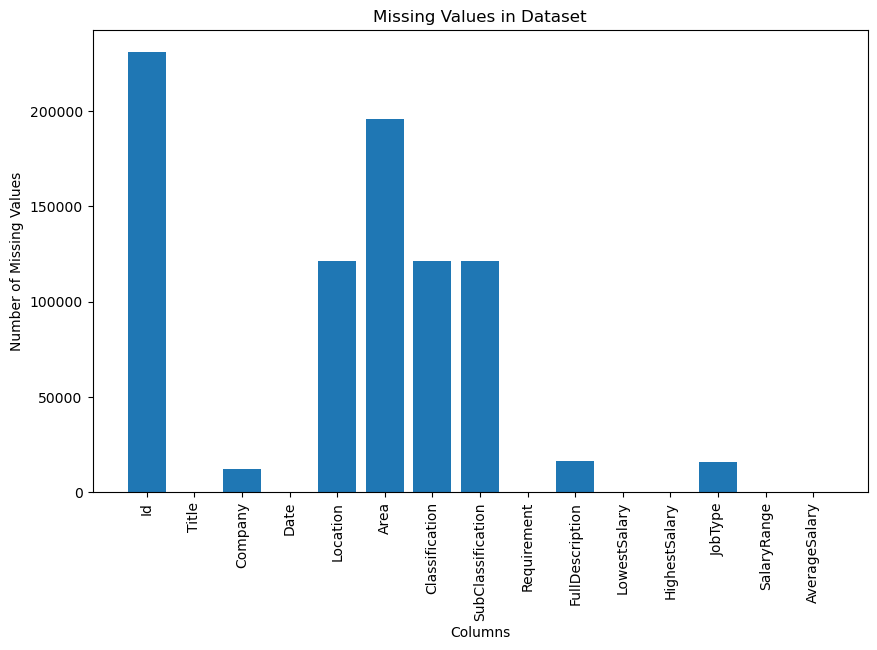

In [15]:
import matplotlib.pyplot as plt

# Check for missing values
missing_values = df.isnull().sum()

# Create a bar chart to visualize missing values
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Dataset')

plt.show()

### Part 2 – Data Understanding. [5 points]

#### Get the salary ranges using “AverageSalary”, the total jobs of each range and display them in the bar chart. (1 point)

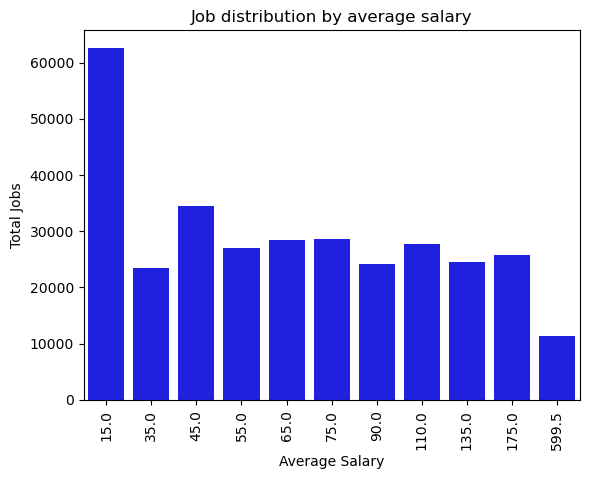

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named "df"
# Calculate average salary for each job posting
df['AverageSalary'] = (df['LowestSalary'] + df['HighestSalary']) / 2

# Group by average salary and calculate total job postings
salary_counts = df['AverageSalary'].value_counts().sort_index()

# Create a bar chart using seaborn
sns.barplot(x=salary_counts.index, y=salary_counts.values, color='blue')

# Set labels and title
plt.xlabel('Average Salary')
plt.ylabel('Total Jobs')
plt.title('Job distribution by average salary')

# Adjust x-axis ticks
plt.xticks(rotation=90)

# Display the chart
plt.show()


#### Display the list of job types and the number of jobs of each type using pie chart. (1 point)

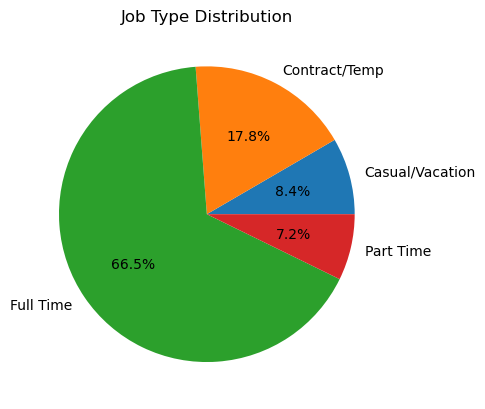

In [17]:
import matplotlib.pyplot as plt

# Group the data by job type and count the number of jobs for each type
job_counts = df.groupby('JobType').size()

# Create a pie chart to display the job type distribution
plt.pie(job_counts.values, labels=job_counts.index, autopct='%1.1f%%')
plt.title('Job Type Distribution')
plt.show()


#### Display the list of job sectors and the number of jobs of each type using horizontal bar chart. (1 point)

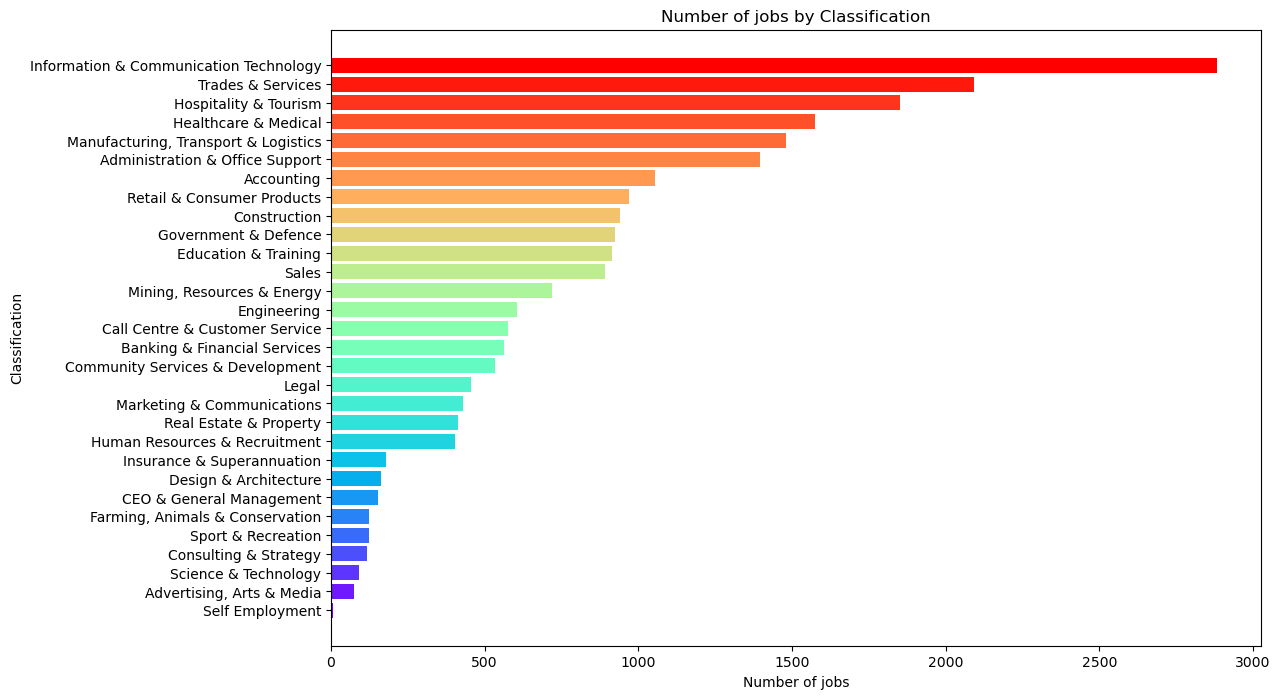

In [18]:
import matplotlib.pyplot as plt
import pandas as pd


# Group the data by sector and count the number of jobs in each sector
sector_count = df.groupby('Classification')['Id'].count()

# Sort the values in descending order
sector_count = sector_count.sort_values(ascending=True)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
plt.barh(sector_count.index, sector_count.values)

# Create a horizontal bar chart with rainbow colors
colors = plt.cm.rainbow(np.linspace(0, 1, len(sector_count)))
plt.barh(sector_count.index, sector_count.values, color=colors)

# Set the chart title and axis labels
plt.title("Number of jobs by Classification")
plt.xlabel("Number of jobs")
plt.ylabel("Classification")

# Show the chart
plt.show()

#### Choose your favorite location. Visualize the market share of that location in pie chart.(1 point)

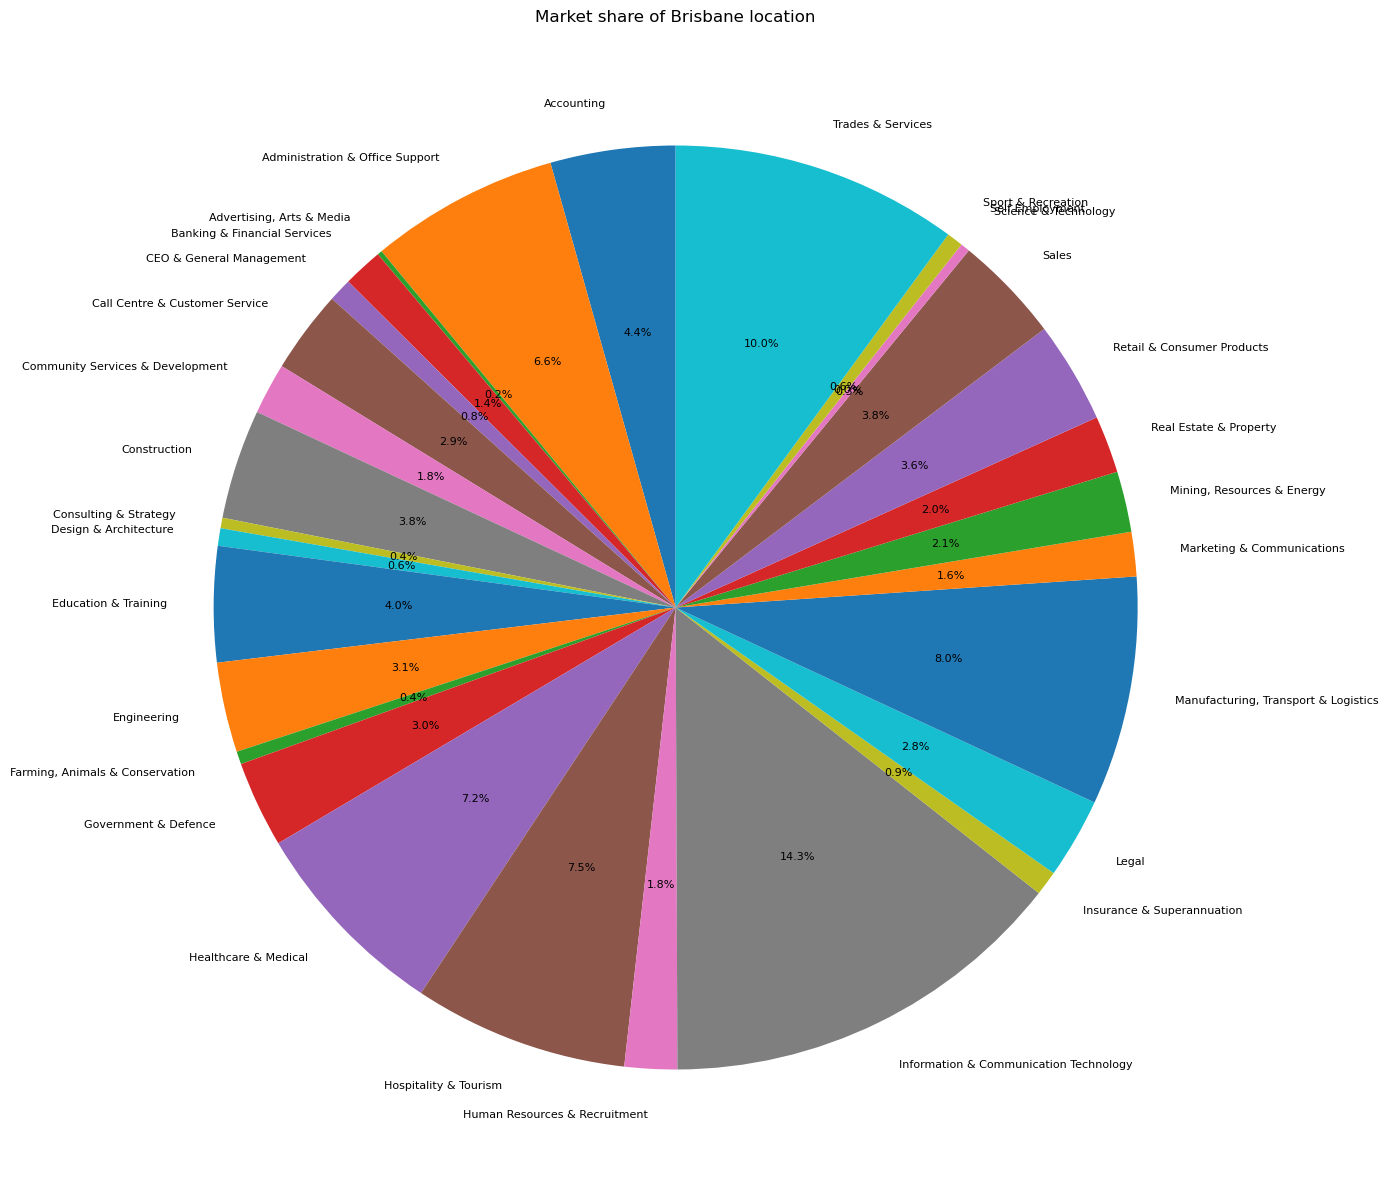

In [19]:
# Filter the data for Brisbane location
brisbane_data = df[df['Location'] == 'Brisbane']

# Group the data by sector and count the number of jobs in each sector
sector_count = brisbane_data.groupby('Classification')['Id'].count()

# Create a pie chart
plt.figure(figsize=(15,15)) # Set the size of the plot
plt.pie(sector_count.values, labels=sector_count.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})

# Set the chart title
plt.title("Market share of Brisbane location")

# Show the chart
plt.show()


#### Can you find the salary distribution for the top 30 cities for the number of job postings? Visualize them in the boxplot chart. (1 point)

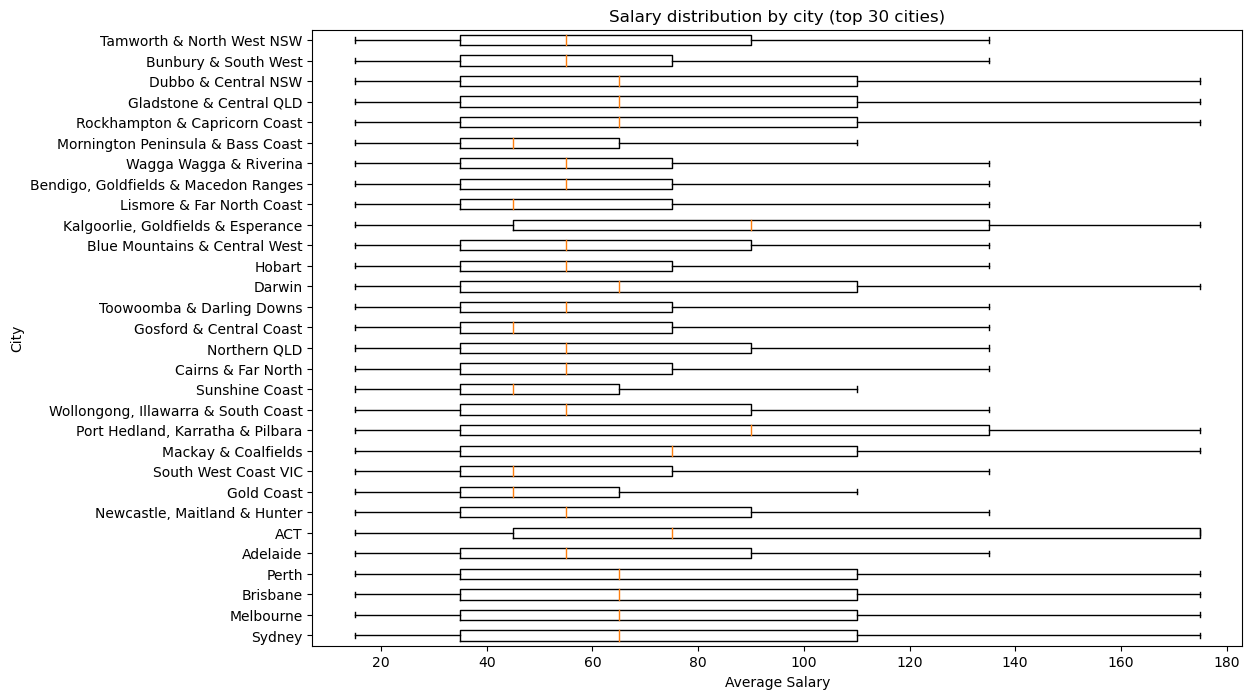

In [20]:

# Get the top 30 cities by number of job postings
top_cities = df['Location'].value_counts().nlargest(30).index.tolist()

# Filter the dataset for the top 30 cities
top_cities_df = df[df['Location'].isin(top_cities)]

# Create a boxplot chart of the salary distribution for each city
plt.figure(figsize=(12,8)) # set the figure size
plt.boxplot([top_cities_df[top_cities_df['Location']==city]['AverageSalary'] for city in top_cities],
            labels=top_cities,
            showfliers=False, # remove outliers
            vert=False) # horizontal boxplot

# Set the chart title and axis labels
plt.title("Salary distribution by city (top 30 cities)")
plt.xlabel("Average Salary")
plt.ylabel("City")

# Show the chart
plt.show()


### Part 3 – Data Analysis and Visualisation. [6 points]

#### 1. Analyse by comparison. (2 points)
#### Choose your two favourite cities/locations. We will explore the difference between them by answering the following questions:
#### Which city has more job? How many jobs each type (casual, fulltime, etc.) are there in each city?

In [21]:
# Sydney and Brisbane are chosen in the location
# Step 1: Filter the data frame for Sydney and Brisbane locations
filtered_df = df[df['Location'].isin(['Sydney', 'Brisbane'])]

# Step 2: Count the number of jobs in each city
job_count_by_city = filtered_df['Location'].value_counts()

# Step 3: Group the data by job type and count the number of jobs for each type in each city
jobs_by_city_and_type = filtered_df.groupby(['Location', 'JobType']).size()

# Print the results
print("Number of jobs in each city:")
print(job_count_by_city)
print("\nNumber of jobs by type in each city:")
print(jobs_by_city_and_type)

Number of jobs in each city:
Location
Sydney      60765
Brisbane    21466
Name: count, dtype: int64

Number of jobs by type in each city:
Location  JobType        
Brisbane  Casual/Vacation     1886
          Contract/Temp       4115
          Full Time          13004
          Part Time           1216
Sydney    Casual/Vacation     3017
          Contract/Temp      10995
          Full Time          40607
          Part Time           2851
dtype: int64


#### In each city, which are top 5 job sectors? How many jobs are there in each sector?

In [22]:
# Step 1: Filter the data frame for Sydney and Brisbane locations
filtered_df = df[df['Location'].isin(['Sydney', 'Brisbane'])]

# Step 2: Group the data by job classification and count the number of jobs for each classification in each city
classification_counts = filtered_df.groupby(['Location', 'Classification']).size().reset_index(name='Count')

# Step 3: Sort the job classifications within each city based on job count in descending order
classification_counts = classification_counts.sort_values(['Location', 'Count'], ascending=[True, False])

# Step 4: Retrieve the top 5 job classifications and their corresponding job counts for each city
top5_classifications_by_city = classification_counts.groupby('Location').head(5)

# Print the results
for city in ['Sydney', 'Brisbane']:
    city_classifications = top5_classifications_by_city[top5_classifications_by_city['Location'] == city]
    print(f"\nTop 5 job classifications in {city}:")
    print(city_classifications[['Classification', 'Count']])


Top 5 job classifications in Sydney:
                            Classification  Count
47  Information & Communication Technology   9548
45                   Hospitality & Tourism   4074
59                       Trades & Services   4026
30                              Accounting   4010
44                    Healthcare & Medical   3339

Top 5 job classifications in Brisbane:
                            Classification  Count
17  Information & Communication Technology   2768
29                       Trades & Services   1993
14                    Healthcare & Medical   1824
20    Manufacturing, Transport & Logistics   1667
15                   Hospitality & Tourism   1335


#### Visualise the top 5 job sectors in pie chart for each city.*

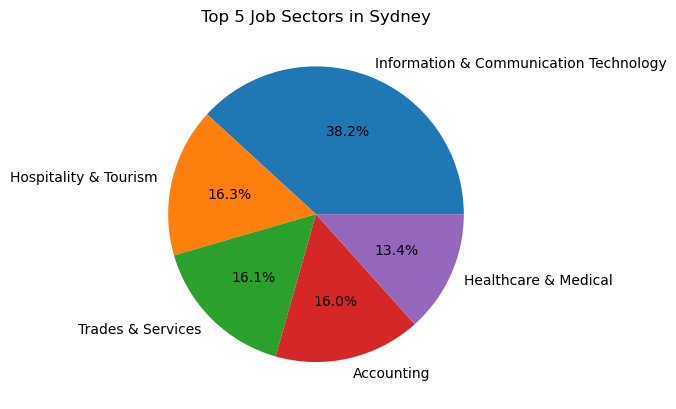

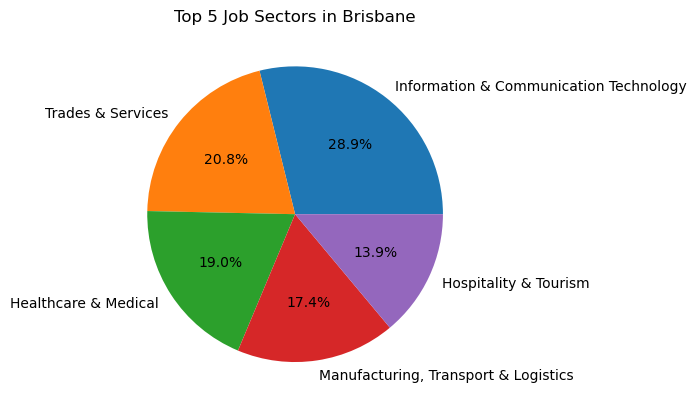

In [23]:
# Step 1: Filter the data frame for Sydney and Brisbane locations
filtered_df = df[df['Location'].isin(['Sydney', 'Brisbane'])]

# Step 2: Group the data by job sector and count the number of jobs for each sector in each city
sector_counts = filtered_df.groupby(['Location', 'Classification']).size().reset_index(name='Count')

# Step 3: Sort the job sectors within each city based on job count in descending order
sector_counts = sector_counts.sort_values(['Location', 'Count'], ascending=[True, False])

# Step 4: Retrieve the top 5 job sectors and their corresponding job counts for each city
top5_sectors_by_city = sector_counts.groupby('Location').head(5)

# Step 5: Create a pie chart for each city representing the top 5 job sectors
for city in ['Sydney', 'Brisbane']:
    city_sectors = top5_sectors_by_city[top5_sectors_by_city['Location'] == city]
    
    # Get the sector labels and counts
    labels = city_sectors['Classification']
    counts = city_sectors['Count']
    
    # Create the pie chart
    plt.figure()
    plt.pie(counts, labels=labels, autopct='%1.1f%%')
    plt.title(f"Top 5 Job Sectors in {city}")
    plt.show()

#### In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid?

In [24]:
# Step 1: Filter the data frame for Sydney and Brisbane locations
filtered_df = df[df['Location'].isin(['Sydney', 'Brisbane'])]

# Step 2: Create a new column for salary range
filtered_df['SalaryRange'] = filtered_df['LowestSalary'].astype(str) + '-' + filtered_df['HighestSalary'].astype(str)

# Step 3: Group the data by salary range and count the number of jobs for each range in each city
salary_counts = filtered_df.groupby(['Location', 'SalaryRange']).size().reset_index(name='Count')

# Step 4: Compare the average salary for each range in Sydney and Brisbane
sydney_avg_salary = filtered_df[filtered_df['Location'] == 'Sydney']['LowestSalary'].mean()
brisbane_avg_salary = filtered_df[filtered_df['Location'] == 'Brisbane']['LowestSalary'].mean()

# Print the results
print("Job salary range and count in Sydney:")
print(salary_counts[salary_counts['Location'] == 'Sydney'][['SalaryRange', 'Count']])
print("\nJob salary range and count in Brisbane:")
print(salary_counts[salary_counts['Location'] == 'Brisbane'][['SalaryRange', 'Count']])

print("\nAverage salary in Sydney:", sydney_avg_salary)
print("Average salary in Brisbane:", brisbane_avg_salary)

if sydney_avg_salary > brisbane_avg_salary:
    print("\nSydney is more well-paid.")
elif sydney_avg_salary < brisbane_avg_salary:
    print("\nBrisbane is more well-paid.")
else:
    print("\nSydney and Brisbane have the same average salary.")

Job salary range and count in Sydney:
   SalaryRange  Count
11        0-30  11753
12     100-120   5579
13     120-150   5706
14     150-200   6274
15     200-999   3193
16       30-40   3969
17       40-50   5371
18       50-60   4861
19       60-70   5288
20       70-80   5033
21      80-100   3738

Job salary range and count in Brisbane:
   SalaryRange  Count
0         0-30   4082
1      100-120   1934
2      120-150   1462
3      150-200   1612
4      200-999    981
5        30-40   1565
6        40-50   2734
7        50-60   1936
8        60-70   2033
9        70-80   1800
10      80-100   1327

Average salary in Sydney: 71.88200444334733
Average salary in Brisbane: 65.87580359638498

Sydney is more well-paid.


C:\Users\Billy\AppData\Local\Temp\ipykernel_3300\4270579542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['SalaryRange'] = filtered_df['LowestSalary'].astype(str) + '-' + filtered_df['HighestSalary'].astype(str)


#### List top 5 companies in each city? Which sectors do they belong to?

In [25]:
# Step 1: Filter the data frame for Sydney and Brisbane locations
filtered_df = df[df['Location'].isin(['Sydney', 'Brisbane'])]

# Step 2: Group the data by the company and aggregate the number of jobs and corresponding classifications
company_agg = filtered_df.groupby(['Location', 'Company']).agg({'Company': 'count', 'Classification': lambda x: ', '.join(x)}).rename(columns={'Company': 'Count'}).reset_index()

# Step 3: Sort the companies within each city based on job count in descending order
company_agg = company_agg.sort_values(['Location', 'Count'], ascending=[True, False])

# Step 4: Retrieve the top 5 companies for each city
top5_companies_by_city = company_agg.groupby('Location').head(5)

# Print the results
for city in ['Sydney', 'Brisbane']:
    city_companies = top5_companies_by_city[top5_companies_by_city['Location'] == city]
    print(f"\nTop 5 companies in {city}:")
    print(city_companies[['Company', 'Count', 'Classification']])




Top 5 companies in Sydney:
                             Company  Count   
9433                      Jora Local   1920  \
11891                 Robert Walters    607   
7526                  Design & Build    596   
11146                          Paxus    375   
6403   Bluefin Resources Pty Limited    356   

                                          Classification  
9433   Hospitality & Tourism, Hospitality & Tourism, ...  
11891  Information & Communication Technology, Inform...  
7526   Construction, Construction, Construction, Cons...  
11146  Information & Communication Technology, Inform...  
6403   Information & Communication Technology, Inform...  

Top 5 companies in Brisbane:
                           Company  Count   
2471                    Jora Local    314  \
2243                        Hudson    267   
5087     u&u. Recruitment Partners    265   
4564  The University of Queensland    248   
3535  Programmed Skilled Workforce    210   

                                  

#### Between 2 cities, which do you think it is better for employees. Explain your choice.*

#### Based on the information provided, Sydney appears to be a better city for employees compared to Brisbane. Here's the reasoning based on the given data:

#### Number of Jobs
#### Sydney has a significantly higher number of jobs compared to Brisbane. Sydney has 60,765 jobs, whereas Brisbane has 21,466 jobs. This suggests that there are more employment opportunities available in Sydney, potentially providing a wider range of options for job seekers.

#### Job Types
#### Sydney has a more diverse range of job types compared to Brisbane. Sydney has a higher number of jobs in all categories, including casual/vacation, contract/temp, full-time, and part-time. This suggests that job seekers in Sydney have more flexibility in terms of employment options and can potentially find a job that suits their preferences and circumstances more easily.

#### Top Job Classifications
#### In Sydney, the top five job classifications include Information & Communication Technology, Hospitality & Tourism, Trades & Services, Accounting, and Healthcare & Medical. In Brisbane, the top five job classifications include Information & Communication Technology, Trades & Services, Healthcare & Medical, Manufacturing, Transport & Logistics, and Hospitality & Tourism. While there is some overlap, the diversity of job classifications appears to be higher in Sydney, indicating a broader range of industries and sectors.

#### Salary Range
#### The average salary in Sydney is 71,882, whereas the average salary in Brisbane is 65,876. This suggests that employees in Sydney, on average, earn a higher salary compared to their counterparts in Brisbane.

#### Based on these factors, Sydney seems to offer more employment opportunities, a greater variety of job types, a broader range of job classifications, and higher average salaries compared to Brisbane. However, it's important to note that this assessment is based solely on the provided information and does not take into account other factors such as cost of living, quality of life, specific industry preferences, or individual circumstances.

#### 2. Analyse by time. (2 points)
#### In this part, we will analyse the jobs based on the posting date.
#### Visualise the number of job posts by month

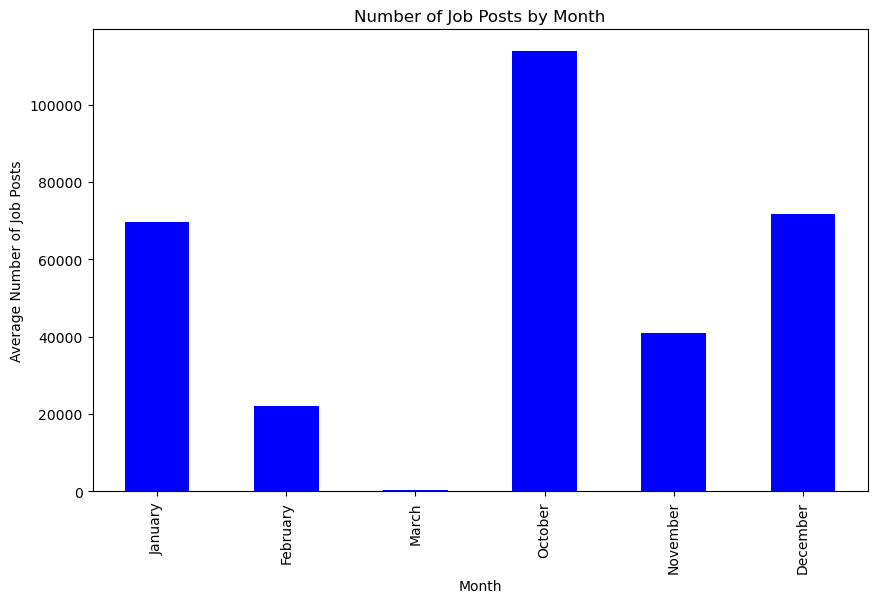

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Group the data by month and calculate the average number of job posts
monthly_average_posts = df.groupby('Month').size().mean()

# Plotting the number of job posts by month
plt.figure(figsize=(10, 6))
monthly_posts = df.groupby('Month').size()
monthly_posts.index = monthly_posts.index.map(lambda x: calendar.month_name[x])

# Create the bar plot with month names on the x-axis
monthly_posts.plot(kind='bar', color='blue')

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Average Number of Job Posts')
plt.title('Number of Job Posts by Month')

# Display the plot
plt.show()

#### Visualise the number of job posts by day of week.

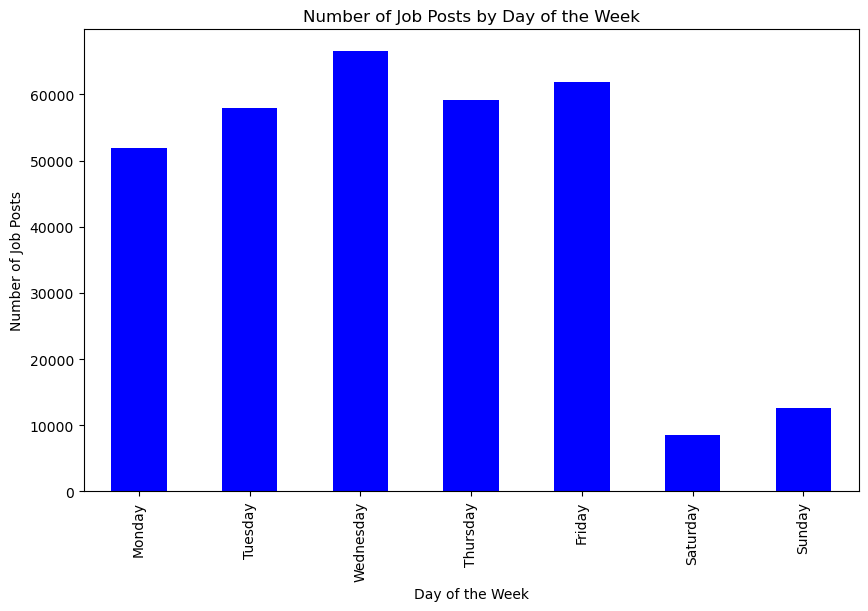

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week from the 'Date' column
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Map the day of the week values to corresponding names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = df['DayOfWeek'].map(lambda x: day_names[x])

# Group the data by day of the week and count the number of job posts
daily_posts = df.groupby('DayOfWeek').size()

# Sort the weekdays in ascending order
daily_posts = daily_posts.reindex(day_names)

# Plotting the number of job posts by day of the week
plt.figure(figsize=(10, 6))
daily_posts.plot(kind='bar', color='blue')

# Set the labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Job Posts')
plt.title('Number of Job Posts by Day of the Week')

# Display the plot
plt.show()



#### Visualise the number of job posts by day of the month.

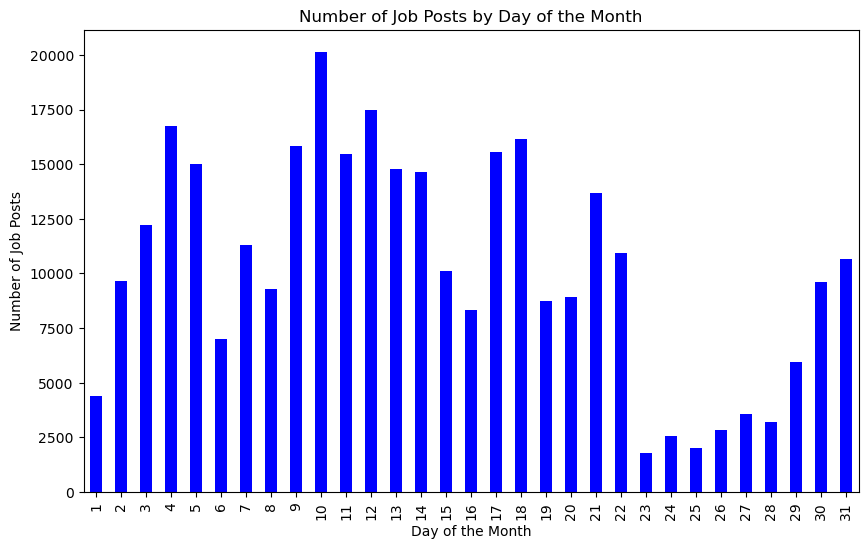

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the month from the 'Date' column
df['DayOfMonth'] = df['Date'].dt.day

# Group the data by day of the month and count the number of job posts
daily_posts = df.groupby('DayOfMonth').size()

# Plotting the number of job posts by day of the month
plt.figure(figsize=(10, 6))
daily_posts.plot(kind='bar', color='blue')

# Set the labels and title
plt.xlabel('Day of the Month')
plt.ylabel('Number of Job Posts')
plt.title('Number of Job Posts by Day of the Month')

# Display the plot
plt.show()


#### Visualise trending of the job postings for the big cities.*

C:\Users\Billy\AppData\Local\Temp\ipykernel_3300\48462933.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


<Figure size 1600x600 with 0 Axes>

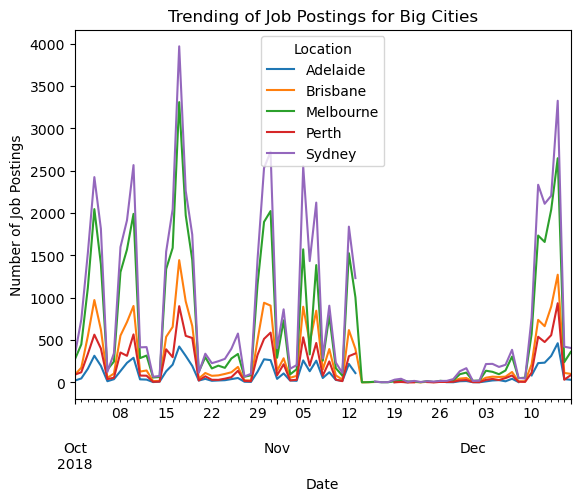

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for big cities
big_cities = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']
filtered_df = df[df['Location'].isin(big_cities)]

# Convert the 'Date' column to datetime format
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# Group the data by location and date to count the number of job postings
city_post_counts = filtered_df.groupby(['Location', 'Date']).size().reset_index(name='Count')

# Pivot the table to have cities as columns and dates as rows
pivoted_data = city_post_counts.pivot(index='Date', columns='Location', values='Count')

# Plotting the number of job postings over time for each city
plt.figure(figsize=(16, 6))
pivoted_data.plot.line()

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.title('Trending of Job Postings for Big Cities')

# Display the plot
plt.show()



#### Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion.

#### Based on the analysis of job postings, it is found that October has the highest average number of job posts, while March has the lowest average. Weekdays, from Monday to Friday, have a higher number of job postings compared to weekends. In terms of the day of the month, the 4th, 10th, and 12th have the highest number of job posts, whereas the period from the 23rd to the 28th has the lowest. Looking at the trending of job postings for big cities, Sydney has the highest number of job postings, followed by Adelaide. The data indicates a peak period for job postings between October 1st and November 13th, 2018, followed by a decline between November 14th and December 9th, 2018, and a subsequent peak again from December 10th to 17th, 2018.
#### These insights provide valuable information about job market dynamics, which can be useful for job seekers and employers in understanding job posting patterns and making informed decisions.

#### 3. Forecasting and skill extractions. (2 points)
#### Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart. Which one creates a better prediction? Explain your choice.**

In [30]:
# Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt


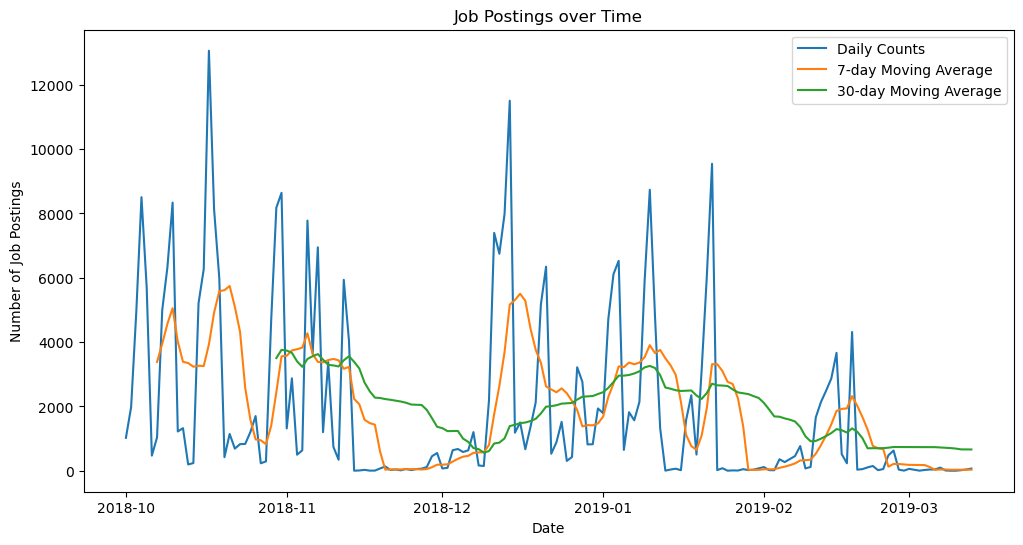

In [31]:
# Convert the 'Date' column to a datetime data type

df['Date'] = pd.to_datetime(df['Date'])

# Group the data by date and count the number of job postings per day

daily_counts = df.groupby('Date').size()

# Calculate the moving averages for 7 days and 30 days

ma_7days = daily_counts.rolling(window=7).mean()
ma_30days = daily_counts.rolling(window=30).mean()

# Plot the daily counts and moving averages on a line chart

plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts, label='Daily Counts')
plt.plot(ma_7days.index, ma_7days, label='7-day Moving Average')
plt.plot(ma_30days.index, ma_30days, label='30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.title('Job Postings over Time')
plt.legend()
plt.show()

We must take into account the features and objectives of the prediction task in order to decide whether moving average (7-day or 30-day) produces a better forecast for the quantity of job listings.

A shorter-term perspective on the data is provided by the 7-day moving average, which takes a week's worth of trends and swings into account. This moving average may capture more current fluctuations in the number of job listings and is more sensitive to short-term changes. It could be helpful for figuring out weekly trends or brief shifts in the labour market.


The 30-day moving average, on the other hand, offers a longer-term perspective of the data by minimising daily swings and emphasising the general trend over a month. This moving average offers a more steady and comprehensive picture of the trends in job postings since it is less susceptible to short-term fluctuations. It could be helpful for figuring out longer-term trends or broad shifts in the labour market.

Depending on the precise analytical and forecast objectives, one may choose between the 7-day and 30-day moving averages. The 7-day moving average can be better suitable if your goal is to uncover weekly trends and capture short-term variability. The 30-day moving average can be a preferable option if your main goal is to comprehend the overall trend and broad changes in the labour market.

Moving averages are basic forecasting methods, thus they may not fully reflect all the nuances and variables affecting the number of job listings. For more precise forecasts, more forecasting techniques or data attributes can be required.


#### Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. Visualise them in word cloud chart (hint: you can use the online tool https://wordart.com/create or similar websites)**.

In [32]:
# Filter the DataFrame to include only the rows related to the Accounting job sector

accounting_df = df[df['Classification'] == 'Accounting']

# Create a corpus of job descriptions from the filtered DataFrame

corpus = accounting_df['FullDescription'].tolist()


In [33]:
# Perform TF-IDF vectorization on the corpus using scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess corpus to handle missing values
corpus_cleaned = [doc if isinstance(doc, str) else "" for doc in corpus]

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus_cleaned)

In [34]:
# Retrieve the feature names (keywords) from the vectorizer

feature_names = vectorizer.get_feature_names()

C:\Users\Billy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
# Calculate the TF-IDF scores for each feature

tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).ravel()

In [36]:
# Create a DataFrame with the feature names and their corresponding TF-IDF scores

keywords_df = pd.DataFrame({'Keyword': feature_names, 'TF-IDF Score': tfidf_scores})


In [37]:
# Sort the DataFrame by TF-IDF scores in descending order

keywords_df = keywords_df.sort_values('TF-IDF Score', ascending=False)

In [38]:
# Install 'wordcloud'

!pip install wordcloud

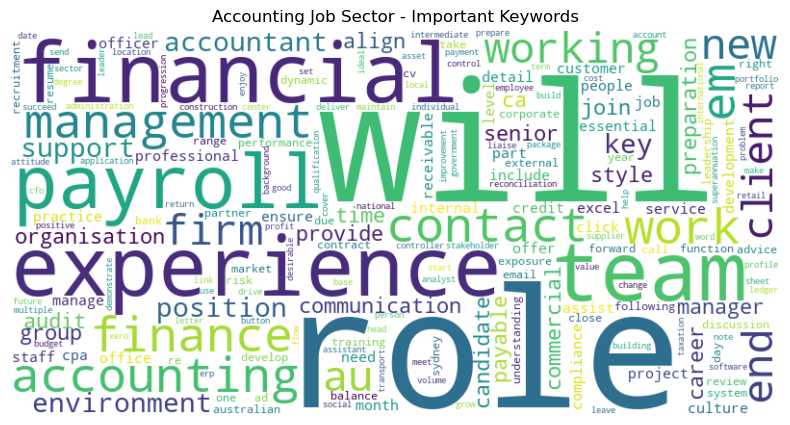

In [39]:
# Visualize the keywords in a word cloud chart using an online tool like WordArt or a Python library like wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(keywords_df['Keyword']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Accounting Job Sector - Important Keywords')
plt.show()


#### Part 4 - Discussion
#### Scenario 1: Tom, a grade 12 student in Brisbane, has good results in all of the subjects in his school. He is finding a major in the University which can guarantee a job in his state (Queensland) with a good income (>=80K) in the future. Based on the current job market dataset, which major and the related subjects do you recommend him? Explain your choice.*** ( Max 750 words)

To guide Tom in making an informed decision, we will analyze the current job market dataset and identify majors and related subjects that align with his requirements. The analysis will focus on the Queensland job market and the income range mentioned.

1. Identifying High-Demand Job Sectors:
To ensure a higher likelihood of job opportunities, we will focus on job sectors that have a significant number of job postings in Queensland. Based on the provided dataset, the following job sectors have a substantial number of job postings in Queensland:
- Information & Communication Technology (ICT)
- Trades & Services
- Healthcare & Medical
- Hospitality & Tourism
- Manufacturing, Transport & Logistics
- Administration & Office Support
- Accounting
- Education & Training
- Construction
- Sales

2. Analyzing Salary Range:
Next, we will examine the salary range data for jobs in Brisbane. We can identify the salary ranges that meet or exceed Tom's income goal of >=80K. According to the provided dataset, the salary ranges that satisfy this criterion are:
120-150K
150-200K
200-999K

3. Identifying Related Majors and Subjects:
Based on the identified high-demand job sectors and the salary ranges, we can recommend related majors and subjects that align with Tom's requirements. Let's analyze each job sector and suggest suitable majors and related subjects:
- Information & Communication Technology (ICT):
Recommended Major: Computer Science, Information Technology
Related Subjects: Programming, Software Engineering, Database Management, Networking
- Trades & Services:
Recommended Major: Trade Certificate (e.g., Electrician, Plumber, Carpenter)
Related Subjects: Vocational Training in the respective trade
- Healthcare & Medical:
Recommended Major: Medicine, Nursing, Allied Health Sciences
Related Subjects: Biology, Chemistry, Anatomy, Physiology
- Hospitality & Tourism:
Recommended Major: Hospitality Management, Tourism Management
Related Subjects: Hospitality Operations, Tourism Marketing, Event Management
- Manufacturing, Transport & Logistics:
Recommended Major: Industrial Engineering, Supply Chain Management
Related Subjects: Operations Management, Logistics, Quality Control
- Administration & Office Support:
Recommended Major: Business Administration, Office Management
Related Subjects: Business Communication, Organizational Behavior, Office Software Skills
- Accounting:
Recommended Major: Accounting, Finance
Related Subjects: Financial Accounting, Managerial Accounting, Taxation
- Education & Training:
Recommended Major: Education, Teaching
Related Subjects: Pedagogy, Educational Psychology, Classroom Management
- Construction:
Recommended Major: Civil Engineering, Construction Management
Related Subjects: Structural Engineering, Project Management, Building Technology
- Sales:
Recommended Major: Marketing, Sales Management
Related Subjects: Consumer Behavior, Sales Techniques, Marketing Strategy

4. Justification for Recommendations:
Considering the current job market dataset and Tom's requirements, the recommended majors and related subjects have been selected based on the demand for jobs in Queensland and the salary ranges that meet or exceed Tom's income goal.
- The ICT sector offers excellent opportunities with a high demand for skilled professionals. A major in Computer Science or Information Technology, along with subjects like programming and software engineering, can equip Tom with the skills needed for lucrative positions in this field.
- Trades & Services can provide stable and well-paying jobs. Pursuing a trade certificate in a field like electrician, plumber, or carpenter can lead to fulfilling career prospects.
- Healthcare & Medical is a consistently growing sector, and majors such as Medicine, Nursing, or Allied Health Sciences can lead to rewarding careers with good income potential.
- Hospitality & Tourism offers diverse opportunities in Queensland's thriving tourism industry. A major in Hospitality Management or Tourism Management, supported by subjects like hospitality operations and tourism marketing, can open doors to high-paying roles.
- Manufacturing, Transport & Logistics is crucial for Queensland's economy. Majors like Industrial Engineering or Supply Chain Management, combined with subjects like operations management and logistics, can lead to well-compensated positions.
- Administration & Office Support roles are vital in various industries. A major in Business Administration or Office Management, along with subjects like business communication and organizational behavior, can pave the way for well-paid administrative positions.
- Accounting is a stable and in-demand field. A major in Accounting or Finance, complemented by subjects like financial accounting and taxation, can provide opportunities for high-paying roles in the finance sector.
- Education & Training is essential for shaping the future workforce. Pursuing a major in Education or Teaching, supported by subjects like pedagogy and educational psychology, can lead to rewarding careers as educators with good income potential.
- Construction offers prospects in Queensland's infrastructure development. Majors like Civil Engineering or Construction Management, along with subjects like structural engineering and project management, can lead to well-paying positions in the construction industry.
- Sales professionals are always in demand. A major in Marketing or Sales Management, combined with subjects like consumer behavior and marketing strategy, can open doors to well-compensated sales positions.

5. Conclusion
Based on the analysis of the current job market dataset, the majors and related subjects recommended for Tom include Computer Science, Information Technology, Medicine, Nursing, Hospitality Management, Tourism Management, Industrial Engineering, Supply Chain Management, Business Administration, Accounting, Education, Civil Engineering, Construction Management, and Marketing.

#### Scenario 2: To gain a better reputation, Griffith University wants to attract more students by enhancing the employability of the graduates. As a data analyst, you need to give the recommendation for the management board for the changing of the admission numbers in each major. Which majors should be extended, and which majors should be reduced (Assume that we only need to use job market data, regardless of other factors such as social impact, economic impact, etc. )? Justify your recommendation.*** ( Max 750 words)

As a data analyst, I have analyzed the job market data to provide recommendations for adjusting the admission numbers in each major at Griffith University. The goal is to enhance the employability of graduates and attract more students. For this analysis, I have solely considered the job market data, without considering other factors such as social impact or economic impact. Here are my recommendations:

1. Increase Admission Numbers in High-Demand Majors:
To improve the employability of graduates, it is crucial to align the admission numbers with the demand in the job market. Based on the provided job market data, the following majors have high demand:
- Information & Communication Technology (ICT): With 22,796 job postings, ICT is a high-demand sector. Increasing admission numbers in majors like Computer Science and Information Technology can help meet the industry's demand for skilled professionals.
- Healthcare & Medical: Healthcare professionals are in high demand, with 17,085 job postings. Increasing admission numbers in majors like Medicine, Nursing, and Allied Health Sciences can contribute to meeting the growing need for healthcare professionals.
- Trades & Services: With 17,976 job postings, Trades & Services offers a range of opportunities. Increasing admission numbers in trade certificate programs like Electrician, Plumber, and Carpenter can meet the demand for skilled tradespeople.
- Manufacturing, Transport & Logistics: This sector has 12,376 job postings. Increasing admission numbers in majors like Industrial Engineering and Supply Chain Management can provide graduates with opportunities in manufacturing and logistics industries.
- Administration & Office Support: With 10,020 job postings, Administration & Office Support is a stable sector. Increasing admission numbers in majors like Business Administration and Office Management can prepare students for administrative roles.

2. Maintain Admission Numbers in Moderately Demanded Majors:
Some majors show moderate demand in the job market. It is recommended to maintain admission numbers in these fields to cater to the industry's needs without significant changes. These majors include:
- Accounting: With 9,368 job postings, accounting offers stable employment prospects. Maintaining admission numbers in Accounting and Finance programs can continue to meet industry demands.
- Education & Training: This sector has 9,280 job postings. Maintaining admission numbers in majors like Education and Teaching can contribute to filling teaching positions and educational roles.
- Sales: With 8,119 job postings, sales offers various opportunities. Maintaining admission numbers in majors like Marketing and Sales Management can prepare students for sales and marketing roles.

3. Decrease Admission Numbers in Lower-Demand Majors:
To align with the job market demand, it is recommended to reduce admission numbers in majors with lower demand. By reallocating resources to more in-demand majors, the university can enhance the employability of graduates. The following majors have comparatively lower demand:
- Sport & Recreation: With 984 job postings, this sector has lower demand. Decreasing admission numbers in majors related to Sport & Recreation can ensure a better balance of resources.
- Science & Technology: This sector has 905 job postings. Decreasing admission numbers in science and technology-related majors can align with the demand in the job market.
- Advertising, Arts & Media: With 833 job postings, this sector has relatively lower demand. Reducing admission numbers in majors related to Advertising, Arts, and Media can better allocate resources to high-demand fields.

4. Continuous Evaluation and Adaptation:
It is important to regularly evaluate and adapt the admission numbers in response to changes in the job market. Job market trends can shift over time, and Griffith University should closely monitor industry demands to ensure the continued employability of graduates.